### PROJECT-RECOMMENDATION SYSTEMs

![Download Image](C:\Users\user\Downloads\download.png)


## Introduction

In a world filled with an endless stream of entertainment options, users are often left stranded in a sea of choices, paralyzed by decision overload when it comes to selecting movies. The quest for the perfect film aligned with individual tastes can feel like an elusive endeavor, leaving viewers frustrated and dissatisfied. Recognizing this pressing challenge, there emerges an urgent call for a transformative solution – an intelligent recommendation system poised to navigate the labyrinth of available movies and deliver tailored suggestions that resonate with each user's unique preferences.

Imagine a scenario where users are greeted with a curated list of top-notch movie recommendations, meticulously tailored to their tastes and preferences. Picture the excitement of discovering hidden cinematic gems or exploring new genres that captivate and enthrall. This project embarks on a journey to revolutionize the movie-watching experience, providing users with a personalized roadmap to cinematic bliss. By harnessing the power of cutting-edge technology and sophisticated algorithms, we aim to unlock a world of endless possibilities, enhancing user satisfaction and engagement with streaming platforms. Welcome to the future of movie recommendations – where every click opens the door to a world of cinematic delight.

### Business Understanding
In an era where user engagement and satisfaction are paramount, personalized recommendation systems have become indispensable tools for businesses seeking to thrive in the competitive landscape. At Money-team$ Co., we recognize the transformative potential of these systems to not only meet but exceed user expectations. Imagine a world where every click on our streaming platform is met with a tailored recommendation, guiding users on a journey of cinematic exploration perfectly aligned with their tastes and preferences. With our cutting-edge technology and innovative algorithms, we are poised to redefine the movie-watching experience, making each interaction a seamless blend of excitement and anticipation.

For stakeholders invested in the success of Money-team$ Co., this project signifies more than just a technological endeavor – it represents a commitment to excellence and a dedication to providing unparalleled value to our users. By leveraging personalized movie recommendations, we aim to not only enhance user satisfaction but also drive increased viewer retention, platform usage, and revenue generation. Together, let's embark on this thrilling journey towards creating a recommendation system that sets new standards of excellence in the streaming industry, elevating the user experience to unprecedented heights.


### Problem Statement
To recommend top 5 movies based on customer ratings of other movies to money-team Co$ users 

## Objective

## Data Understanding
### Data source
The project data was outsourced from [grouplens](https://grouplens.org/datasets/movielens/latest/).
The MovieLens dataset serves as the backbone for numerous academic papers and machine learning proofs-of-concept, owing to its rich and diverse nature. However, our endeavor is not merely academic; it's about addressing a real-world business problem within the context of recommending movies. Hence, in addition to crafting an efficient recommendation model.

To accomplish this, we delve into the renowned MovieLens dataset, a cornerstone in the realm of recommendation systems. Developed by the GroupLens research lab at the University of Minnesota, the MovieLens dataset contains a wealth of information, encompassing user ratings for a vast array of movies. While the dataset offers various subsets, we recommend utilizing the "small" dataset, which It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. This subset provides a manageable yet comprehensive dataset to derive meaningful insights and build robust recommendation models.


### Datasets understanding

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read link csv file
data1 = pd.read_csv('Data/links.csv')
#show df shape
print(data1.shape)
#print top5 rows
data1.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
#read movie csv file
data2 = pd.read_csv('Data/movies.csv')
#print column/rows shape
print(data2.shape)
data2.head(5)

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#read ratings csv file
data3 = pd.read_csv('Data/ratings.csv')
#show ratings shape
print(data3.shape)
data3.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#read tags csc file
data4 = pd.read_csv('Data/tags.csv')
print(data4.shape)
data4.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
def display_missing_values(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check for missing values
    missing_values = df.isna().sum()
    
    # Display missing values
    print("Missing values in", csv_file)
    print(missing_values)

# Example usage:
# Replace 'file_path.csv' with the path to your CSV file
print(display_missing_values('Data/links.csv'))
print(display_missing_values('Data/movies.csv'))
print(display_missing_values('Data/ratings.csv'))
print(display_missing_values('Data/tags.csv'))

Missing values in Data/links.csv
movieId    0
imdbId     0
tmdbId     8
dtype: int64
None
Missing values in Data/movies.csv
movieId    0
title      0
genres     0
dtype: int64
None
Missing values in Data/ratings.csv
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
None
Missing values in Data/tags.csv
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
None


#### Merge files

In [7]:
#merge dataframes using movie ID
#merge links csv and movies csv
result = pd.merge(data1, data2, on='movieId', how='inner')
#merge result with ratings csv
result = pd.merge(result, data3, on='movieId', how='inner')

In [8]:
result.tail()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,101726,37891.0,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   imdbId     100836 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100836 non-null  object 
 4   genres     100836 non-null  object 
 5   userId     100836 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  100836 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


In [10]:
#checking for duplicated values
duplicates = result[result.duplicated()]
duplicates

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp


In [11]:
#dropping null values
result.dropna(inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
#checking for max and min rating
print("Maximum rating: ",result["rating"].max())
print("Minimum rating: ",result["rating"].min())

Maximum rating:  5.0
Minimum rating:  0.5


In [13]:
result["rating"].value_counts()

rating
4.0    26816
3.0    20044
5.0    13209
3.5    13134
4.5     8551
2.0     7550
2.5     5550
1.0     2811
1.5     1791
0.5     1367
Name: count, dtype: int64

In [14]:
#top ten movie titles
title_count = result["title"].value_counts()
title_count.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [15]:
#top 10 movie genres
genre_counts = result["genres"].value_counts().head(10)
genre_counts

genres
Comedy                       7194
Drama                        6290
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: count, dtype: int64

### Visualizations

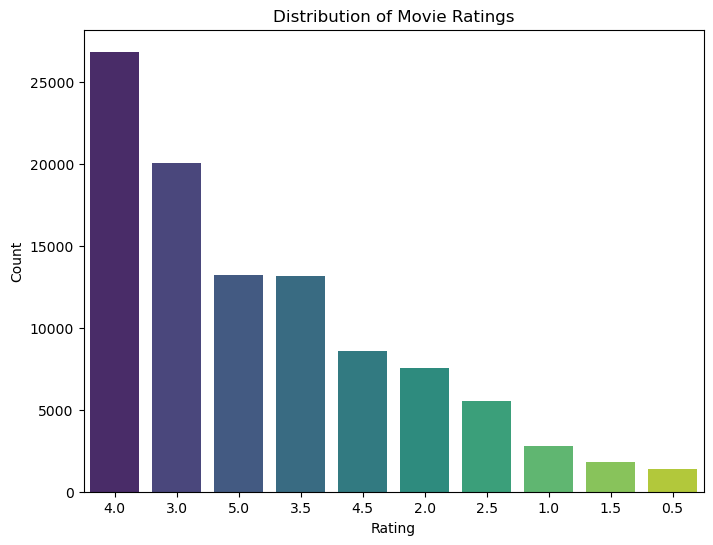

In [16]:
# Get the count of each rating
rating_counts = result['rating'].value_counts()

# Extract the ratings and sort them by count in ascending order
ratings_ordered_by_count = rating_counts.index.tolist()

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=result, order=ratings_ordered_by_count, palette='viridis')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

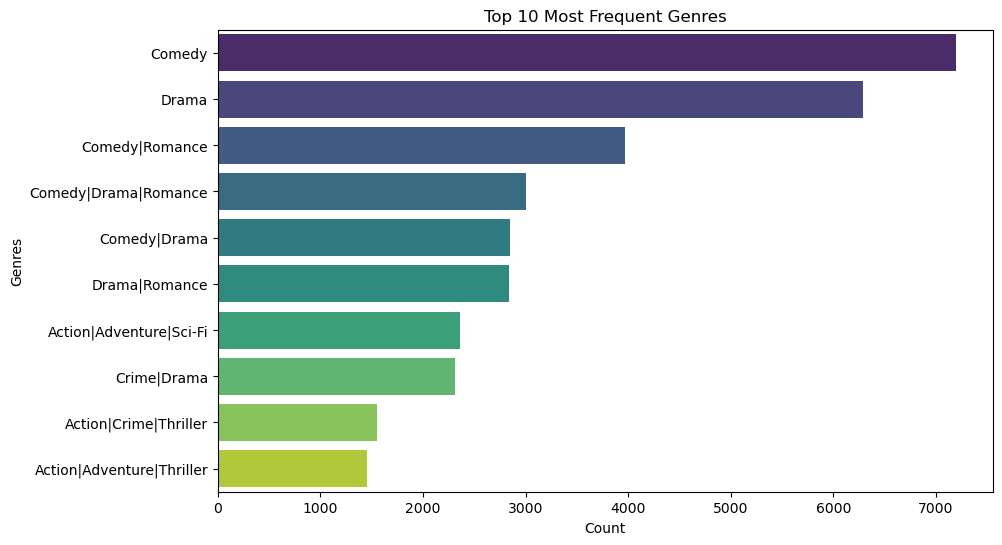

In [17]:
# top 10 most frequent genres
genre_counts = result["genres"].value_counts().head(10)

# Plot the count of top 10 genres with genres on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Most Frequent Genres")
plt.show()


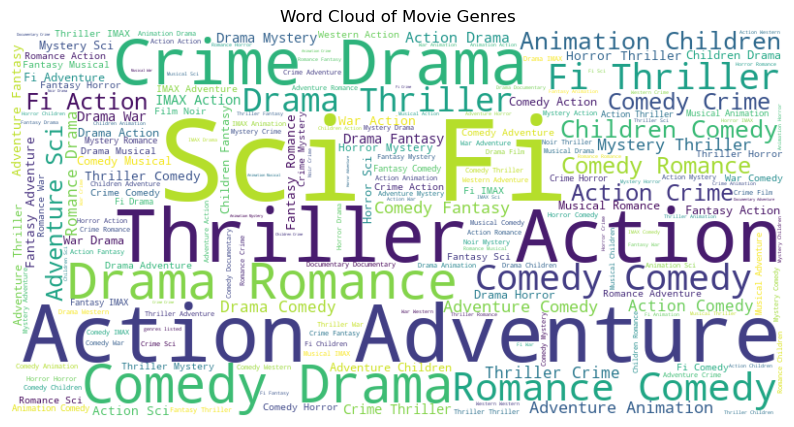

In [18]:
from wordcloud import WordCloud
# Combine all genres into a single string
genres_text = ' '.join(result['genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')  # Hide axis
plt.show()


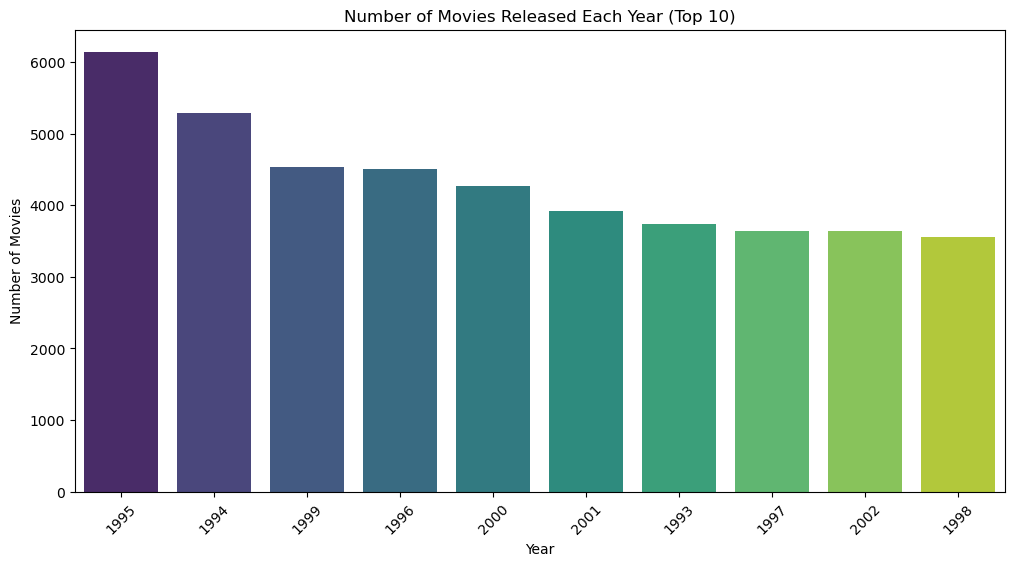

In [19]:
# Extract the year from the title using regular expressions
result['year'] = result['title'].str.extract(r'\((\d{4})\)')

# top 10 years with the highest counts of movies
top_10_years = result['year'].value_counts().head(10)

# Plot the number of movies released in each of the top 10 years
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [20]:
#top 10 user ratings counts
user_rating = result["userId"].value_counts()
user_rating

userId
414    2698
599    2478
474    2108
448    1863
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: count, Length: 610, dtype: int64

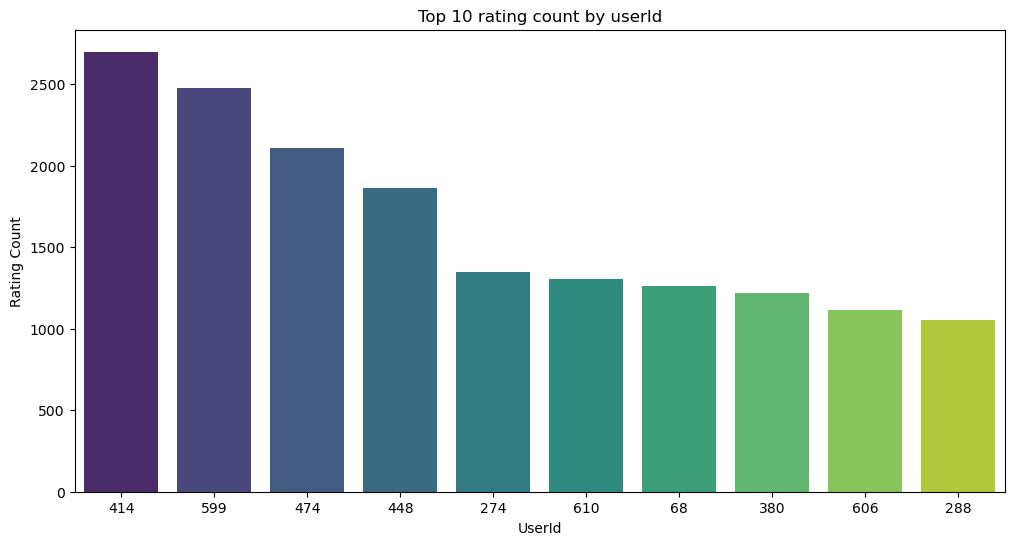

In [21]:
#top 10 userId ratings count
user_rating = result["userId"].value_counts().head(10)
user_ratings = user_rating.sort_values(ascending=False)  # Sort in ascending order

#Convert the index to strings to prioritize the order based on count values
user_ratings.index = user_ratings.index.astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=user_ratings.index, y=user_ratings.values, palette='viridis')

plt.xlabel('UserId')
plt.ylabel('Rating Count')
plt.title('Top 10 rating count by userId')
plt.xticks()
plt.show()

UserId 414

In [22]:
#Convert timestamp to datetime format with correct unit (seconds since the epoch)
result['timesatmp'] = pd.to_datetime(result['timestamp'], unit='s')
result["timesatmp"]

0        2000-07-30 18:45:03
1        1996-11-08 06:36:02
2        2005-01-25 06:52:26
3        2017-11-13 12:59:30
4        2011-05-18 05:28:03
                 ...        
100831   2018-09-16 14:44:42
100832   2018-09-16 14:52:25
100833   2018-09-16 14:56:45
100834   2018-09-16 15:00:21
100835   2018-09-17 04:13:26
Name: timesatmp, Length: 100823, dtype: datetime64[ns]

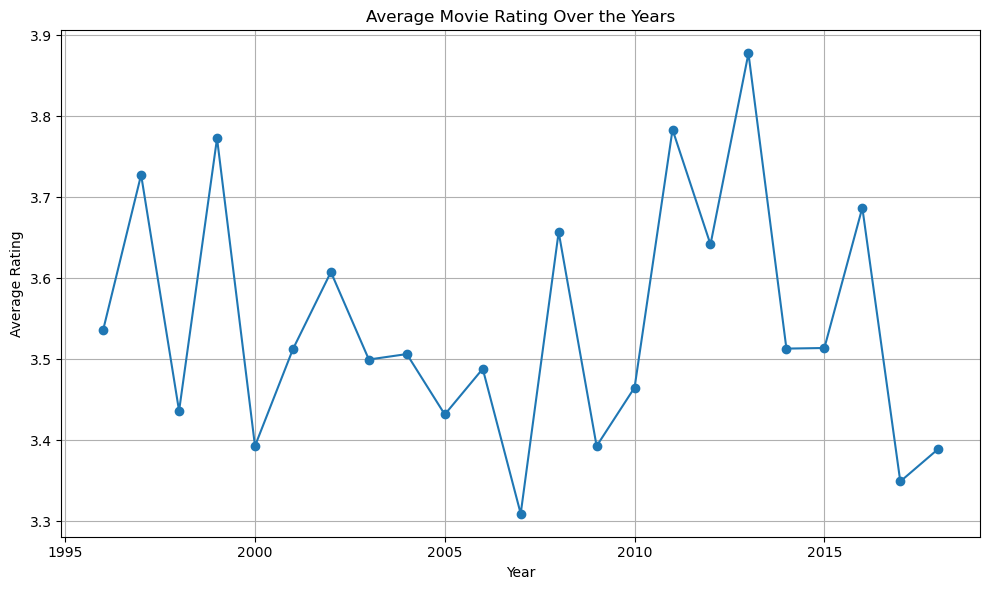

In [23]:
#Extract the year from the datetime column
result['year'] = result['timesatmp'].dt.year

#Aggregate ratings by year
ratings_by_year = result.groupby('year')['rating'].mean()

#Plot the time series
plt.figure(figsize=(10, 6))
ratings_by_year.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()





According to the time series graph and average user ratings per year there are great fluctuations with the highest average rating being in 2013 and the lowest average rating being in 2007.

## Recommendation Models

## Collaborative Filtering model

In collaborative filtering, recommendations are made based on the past behavior of users and/or items. This particular code snippet appears to be preparing the data for collaborative filtering by converting the user-item ratings matrix into a sparse matrix format.

Collaborative filtering techniques can be further divided into two main types:

**Item-Item Collaborative Filtering** In this approach, recommendations are made based on the similarity between items. It identifies items that are similar to the ones the user has interacted with in the past and recommends those similar items.


**User-User Collaborative Filtering** This approach recommends items to a target user based on the preferences of similar users. It computes similarities between users based on their past interactions with items and recommends items that similar users have liked or interacted with.


## Item-Item Collaborative Filtering

Create a pivot table from the result DataFrame. This pivot table is organized such that each row represents a unique user, each column represents a unique movie, and the values are the ratings given by each user to each movie.Each cell in the matrix contains the rating given by a user to a particular movie.

In [24]:
movie_recommendation = result.pivot(index='userId', columns='movieId', values='rating').fillna(0)
movie_recommendation

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movie_recommendation DataFrame is converted into a sparse matrix format using csr_matrix from scipy.sparse. This step is essential for memory efficiency when dealing with large datasets.

.fillna(0):fills any missing values in the pivot table with 0. Missing values typically occur when a user has not rated a particular movie, and filling them with 0 indicates that the user has not rated that movie.

In [28]:
import numpy as np
#caclulate sparsity
movie_recommendation_1 = movie_recommendation.values
total_elements = movie_recommendation_1.size
non_zero_elements = np.count_nonzero(movie_recommendation_1)
sparsity = (1 - non_zero_elements / total_elements)

print(f"Sparsity of the movie recommendation: {sparsity}")


Sparsity of the movie recommendation: 0.9829885131167788


The sparsity of the movie recommendation refers to the proportion of zero values in the matrix compared to the total number of elements. In this case, the sparsity value of approximately 0.98 indicates that the movie recommendation matrix is highly sparse, with around 98.3% of its elements being zero.

In [29]:
# convert the movie_recommendation DataFrame into a sparse matrix format 
from scipy.sparse import csr_matrix
movies_df_metrix= csr_matrix(movie_recommendation.values)

In [30]:
# find the  nearest neighbors based on cosine similarity.
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fit the NearestNeighbors model to the movies_df_metrix sparse matrix. 
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Cosine similarity measures the similarity between data points.

In [31]:
# selects a row from the movie_recommendation matrix and then finds the nearest neighbors 
#of that selected row using the fitted k-nearest neighbors (KNN) model.
# Specify the user ID 
user_id = 17

# find the movies related to the specified user
distances, indices = model_knn.kneighbors(movie_recommendation.loc[user_id, :].values.reshape(1, -1), n_neighbors=6)

1).Selects a user representing a row from the movie_recommendation matrix.

2).Uses the fitted KNN model to find the nearest neighbors of the randomly selected row.

3).Selects the row corresponding to the randomly chosen movie/user from the movie_recommendation matrix.

4).Reshapes the selected row into a 2D array with a single row, which is required as input for the kneighbors method.

In [32]:
# Print recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendations for user_id {user_id}:\n')
    else:
        print(f'{i}: {movie_recommendation.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}:')

Recommendations for user_id 17:

1: 16, with distance of 0.5439043852448859:
2: 400, with distance of 0.547681477784623:
3: 434, with distance of 0.5476964525679999:
4: 247, with distance of 0.5610873824355529:
5: 399, with distance of 0.5858039764574902:


Here we have used cosine similarity to find similar movies to recommend to the users. Therefore, nearest neighbors are those data points that have minimum distance in feature space from our new data point.

Movie ID: 16, Title: [Title of Movie 16], Distance: 0.5439
This movie has a relatively closer similarity to the user's preferences compared to others.

The distance increases from the top recommended movie to the next recommended movie

In [33]:
# Print recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for user_Id {0}:\n'.format(user_id))
    else:
        movie_title = result.loc[movie_recommendation.index[indices.flatten()[i]], 'title']  # Get the movie title
        print('{0}: {1}, with distance of {2}:'.format(i, movie_title, distances.flatten()[i]))

Recommendations for user_Id 17:

1: Toy Story (1995), with distance of 0.5439043852448859:
2: Father of the Bride Part II (1995), with distance of 0.547681477784623:
3: Heat (1995), with distance of 0.5476964525679999:
4: Jumanji (1995), with distance of 0.5610873824355529:
5: Father of the Bride Part II (1995), with distance of 0.5858039764574902:


Here we have used cosine similarity to find similar movies to recommend to the users. Therefore, nearest neighbors are those data points that have minimum distance in feature space from our new data point.

**Person Similarity**

Pearson Correlation: Is also commonly used method for computing similarity. It ranges from [-1, 1] and it represents the linear correlation between two vectors. A correlation value of 0 represents no relationship, -1 represents a high negative correlation and +1 represents high positive correlation.

In [34]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import KNNWithMeans
from surprise import accuracy


#Load the dataset (replace 'path_to_dataset' with the actual path)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

#Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

#Define the model with Pearson correlation as the similarity metric
model = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': False})

#Train the model
model.fit(trainset)

#Make predictions on the test set
predictions = model.test(testset)

#Evaluate the model
accuracy.rmse(predictions)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9065


0.9065452180275577

The item-based collaborative filtering model, utilizing Pearson correlation as the similarity metric, achieved an RMSE (Root Mean Square Error) of approximately 0.9065 on the test dataset. This indicates the average difference between the actual ratings and the predicted ratings by the model. A lower RMSE value suggests better performance in predicting user preferences for movies.

In [35]:
# Select a random user
user_id = 17

# Find the nearest neighbors for the selected user
distances, indices = model_knn.kneighbors(movie_recommendation.iloc[user_id, :].values.reshape(1, -1), n_neighbors=6)

# Print recommendations
print(f'Recommendations for user_id {user_id}:\n')
for i in range(1, len(distances.flatten())):
    movie_index = indices.flatten()[i]
    movie_title = movie_recommendation.index[movie_index]
    print(f'{i}: Movie Title: {movie_title}, with distance of {distances.flatten()[i]}:')

Recommendations for user_id 17:

1: Movie Title: 249, with distance of 0.5586171960612:
2: Movie Title: 305, with distance of 0.5665158993216519:
3: Movie Title: 62, with distance of 0.572851508464222:
4: Movie Title: 247, with distance of 0.5776037146525261:
5: Movie Title: 239, with distance of 0.5781972610273174:


After using Pearson similarity the rmse was 0.9065 and the distance between the data points increased by only a slight margin close to a .01 increase

## User-User collaborative filtering
This approach recommends items to a target user based on the preferences of similar users.

In [36]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

#Load the dataset 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

#Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

#Use Pearson correlation similarity metric )
sim_options = {'name': 'pearson'}

#Initialize the user-user collaborative filtering model
model = KNNBasic(sim_options=sim_options)

#Train the model
model.fit(trainset)

#Make predictions on the test set
predictions = model.test(testset)

#Evaluate the model
accuracy.rmse(predictions)

#Generate recommendations for a specific user 17
user_id = 17
user_recommendations = model.get_neighbors(user_id, k=5)

print("Top 5 similar users for user", user_id, ":", user_recommendations)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9762
Top 5 similar users for user 17 : [16, 18, 23, 61, 68]


The user item rmse was 0.9762 which was an increase fromm the pearson similarity. The model suggests movies for a user based on a different user's preference.

## user-item collaborative filtering recommendation system
It is a type of recommendation system that predicts the preferences or ratings of users for items (products, movies, songs, etc.) based on the past behavior or interactions of users and items. This model is built on the principle that users who have interacted with similar items in the past are likely to have similar preferences in the future, and vice versa.

A user-item collaborative filtering recommendation system using the Singular Value Decomposition (SVD) algorithm. SVD is employed to decompose the user-item interaction matrix into lower-dimensional representations. Reducing the dimensionality of the matrix helps in capturing essential features or latent factors underlying user preferences and item characteristics.

In [42]:
from surprise import SVD
from surprise.accuracy import rmse, mae
#Load  the Data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

#Split the Data into Train and Test Sets
trainset, testset = train_test_split(data, test_size=0.2)

#Train the Collaborative Filtering Model
model = SVD()  # Singular Value Decomposition
model.fit(trainset)

#Make Predictions
predictions = model.test(testset)

#Calculate RMSE
rmse_score = rmse(predictions)

#Calculate MAE
mae_score = mae(predictions)

print(f"RMSE: {rmse_score}")
print(f"MAE: {mae_score}")

RMSE: 0.8737
MAE:  0.6715
RMSE: 0.8736565322788078
MAE: 0.6714527457088281


The Collaborative Filtering model trained using Singular Value Decomposition (SVD) achieved an RMSE (Root Mean Squared Error) of approximately  0.8737 and an MAE (Mean Absolute Error) of approximately  0.6715 on the test set. These metrics indicate that the model's predictions are relatively close to the actual ratings.

Compared to a previous model that did not utilize SVD, which resulted in an RMSE of 0.9768, the SVD-based model demonstrates improved accuracy in predicting ratings. This improvement suggests that leveraging SVD for dimensionality reduction and latent factor modeling has led to more accurate and reliable recommendations in the collaborative filtering framework.

We create a function to enerate top 5 recommendations for a usser uing the above model

In [43]:
#Generate Recommendations
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

#Get top 5 recommendations for user with ID 'user_id'
user_id = 7 
user_top_5_recommendations = get_top_n_recommendations(predictions, n=5)[user_id]

#list of movie Recommendations
for movie_id, estimated_rating in user_top_5_recommendations:
    movie_title = result[result['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie: {movie_title}, Estimated Rating: {estimated_rating}")

Movie: Star Wars: Episode V - The Empire Strikes Back (1980), Estimated Rating: 4.455872215193184
Movie: Lord of the Rings: The Two Towers, The (2002), Estimated Rating: 4.090062679047196
Movie: Sixth Sense, The (1999), Estimated Rating: 3.9165664752121523
Movie: Toy Story (1995), Estimated Rating: 3.8909409113029403
Movie: Jurassic Park (1993), Estimated Rating: 3.733603650517901


This recommendation model demonstrate the effectiveness of the user-item collaborative filtering model in identifying movies that align with the preferences of user 7. By analyzing the user's past ratings and similarities with other users, the model can accurately predict ratings for unseen movies and provide personalized recommendations tailored to the user's interests.

## Hybrid recommendation
A hybrid recommendation system combines multiple recommendation techniques to leverage their strengths and provide more accurate and diverse recommendations. In a hybrid system, the recommendations generated by different approaches (e.g., content-based, collaborative filtering) are integrated or merged to produce a final recommendation list.

The hybrid implements both content-based filtering and collaborative filtering separately. However, it doesn't combine the two approaches into a single hybrid recommendation system.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

#Function to get movie names from IDs
def get_movie_names(movie_ids):
    movie_names = []
    for movie_id in movie_ids:
        movie_data = result[result['movieId'] == movie_id]
        if not movie_data.empty:
            movie_names.append(movie_data['title'].iloc[0])
    return movie_names

#Calculating user-item matrix
user_item_matrix = result.pivot_table(index='userId', columns='movieId', values='rating')

#Calculating item-item similarity matrix based on movie genres
tfidf_vectorizer = TfidfVectorizer()
item_genre_matrix = result.groupby('movieId')['genres'].apply(lambda x: ' '.join(x)).reset_index()
tfidf_matrix = tfidf_vectorizer.fit_transform(item_genre_matrix['genres'])
item_item_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

#Normalize the item-item similarity matrix
scaler = MinMaxScaler()
item_item_similarity_normalized = scaler.fit_transform(item_item_similarity)

#Hybrid recommendation function
def hybrid_recommendation(user_id, movie_id):
    #Collaborative filtering: Get top 5 similar users
    similar_users = user_item_matrix.loc[user_id].dropna().index
    #Content-based filtering to get top 5 similar items based on item-item similarity
    similar_items = item_item_similarity_normalized[movie_id].argsort()[-5:][::-1]
    
    #Return only the top 5 recommendations with movie names
    return list(similar_items)

#Hybrid recommendations for user_id and movie_id
user_id = 1
movie_id = 1

recommendations = hybrid_recommendation(user_id, movie_id)
print(f"Similar movies for user {user_id}:")
for recommendation in recommendations:
    movie_names = get_movie_names([recommendation])
    if movie_names:
        movie_name = movie_names[0] 
        print(f"Movie ID: {recommendation}, Movie Name: {movie_name}")
    



Similar movies for user 1:
Movie ID: 1614, Movie Name: In & Out (1997)
Movie ID: 6051, Movie Name: Harder They Come, The (1973)
Movie ID: 53, Movie Name: Lamerica (1994)


## Recommendation model with Surprise(cross validation,PCA)
How does the surprise recommendation work

User is prompted to rate different movies based on users preferred genre
Obtain a prediction for a specific user for a particular item
Introduce a new user with rating to a rating matrix and make recommendations for the user
Return the top n recommendations for a user

In [66]:
#selecting columns to use in the system
new_df = result[['userId', 'movieId', 'rating','title','genres']]
new_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [67]:
# Create a reader
reader = Reader()
#  columns in the DataFrame (user_id, movieId, rating)
columns = ['userId', 'movieId', 'rating']

# Load data from DataFrame into Surprise Dataset
data = Dataset.load_from_df(new_df[columns], reader)
data

Comparing the different models such as KNN cross validation and see which ones perform best. For consistency sake we used RMSE to evaluate models.

In [78]:
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# Load the dataset
data = Dataset.load_builtin('ml-100k')

# Define the parameter grid
param_grid = {'n_factors': [20, 30, 60, 100],
              'reg_all': [0.02, 0.04, 1]}

# Perform cross-validation with GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Best RMSE and MAE scores
print(gs.best_score['rmse'])
print(gs.best_score['mae'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9394659983920016
0.7426878198551158
{'n_factors': 100, 'reg_all': 0.04}


**New user ratings**

In [80]:
selected_columns = result[['movieId', 'title', 'genres']]
selected_columns.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
new_df = result[['userId', 'movieId', 'rating','title','genres']]
new_df.head()

In [82]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of movies: ', dataset.n_items)

Number of users:  943 

Number of movies:  1682


In [83]:
svd = SVD(n_factors= 100, reg_all=0.04)
svd.fit(dataset)
svd.predict(7, 4)

Prediction(uid=7, iid=4, r_ui=None, est=3.52986, details={'was_impossible': False})

The parameters used for Single Value Decomposition here are from the cross validation in tuning the parameters.The parameters being used gave our lowest rmse in all the models

The prediction for example for user 7 above was a rating of 3.5 the recommended movies for user 7 will have to be movies around 3.5 to 4.5

The first step is to create a function that allows us to pick randomly selected movies. The function should present users with a movie and ask them to rate it. If they have not seen the movie, they should be able to skip rating it.

In [84]:
#defining function to prompt the user to rate movies 
def movie_rater(movie_df,num, genre=None):
    userID = 100
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

A user gets to rate different movies the user has watched. This in turn recommends to the user movies according to the genre they preferred and according to the ratings they gave.

In [85]:
# try out the new function here!
user_rating = movie_rater(selected_columns, 5, 'Comedy')

       movieId            title                          genres
98266   122904  Deadpool (2016)  Action|Adventure|Comedy|Sci-Fi
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
       movieId               title                genres
33922     1639  Chasing Amy (1997)  Comedy|Drama|Romance
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
       movieId                        title                genres
14534      539  Sleepless in Seattle (1993)  Comedy|Drama|Romance
How do you rate this movie on a scale of 1-5, press n if you have not seen :
3
       movieId                               title  \
38253     2012  Back to the Future Part III (1990)   

                                genres  
38253  Adventure|Comedy|Sci-Fi|Western  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
       movieId                   title                genres
89826    70183  Ugly Truth, The (2009)  Comedy|Drama|Roman

Below is how the user 100 has rated the different movie Ids.

In [86]:
user_rating

[{'userId': 100, 'movieId': 122904, 'rating': '5'},
 {'userId': 100, 'movieId': 1639, 'rating': '4'},
 {'userId': 100, 'movieId': 539, 'rating': '3'},
 {'userId': 100, 'movieId': 2012, 'rating': '5'},
 {'userId': 100, 'movieId': 70183, 'rating': '4'}]

The model below will therefore recommend top 5 movies to the user based on the ratings of movies the user has provided above.

In [91]:
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([new_df, user_ratings], axis=0)
new_data = Dataset.load_from_df(new_df[['userId', 'movieId', 'rating']], reader)

#train a model using the new combined DataFrame
svd_ = SVD(n_factors= 100, reg_all=0.04)
svd_.fit(new_data.build_full_trainset())

#make predictions for the user
list_of_movies = []
for m_id in new_df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

#return the top n recommendations using the 
def recommended_movies(recommendations, df, n):
    for idx, rec in enumerate(recommendations):
        title = df.loc[df['movieId'] == int(rec[0])]['title'].iloc[0]
        print('Recommendation #', idx+1, ':', title)
        n -= 1
        if n == 0:
            break

#Recommend top 5 movies
recommended_movies(ranked_movies, new_df, 5,)

Recommendation # 1 : Shawshank Redemption, The (1994)
Recommendation # 2 : Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Recommendation # 3 : Lawrence of Arabia (1962)
Recommendation # 4 : Rear Window (1954)
Recommendation # 5 : Streetcar Named Desire, A (1951)


In [93]:
import pickle
#Save the last model
with open('svd.pkl', 'wb') as file:
    pickle.dump(svd, file)